<a href="https://colab.research.google.com/github/haticebaydemir/face_detection_mtcnn/blob/main/mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn opencv-python

1/1 [==============================] - 0s 168ms/step


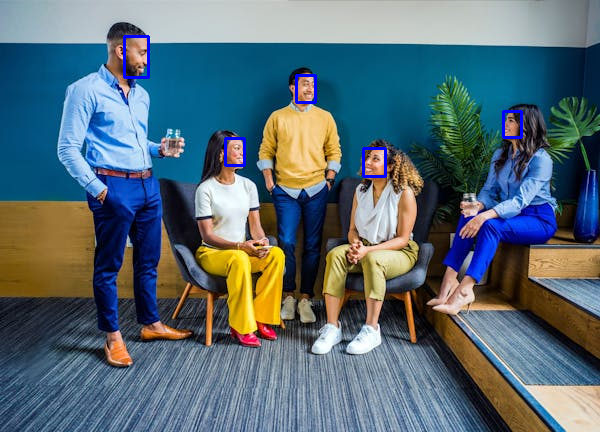

In [ ]:
#MTCNN (Multi-task Cascaded Convolutional Networks)
from google.colab.patches import cv2_imshow  # Google Colab'da cv2_imshow fonksiyonunu içeri aktarıyoruz
import cv2
from mtcnn import MTCNN #MTCNN, derin öğrenme tabanlı bir yüz tespit algoritmasıdır.
#MTCNN, genellikle daha hassas ve farklı açılardan yüzleri daha iyi tespit edebilir

# Resmi yükle
image_path = 'test4.jpg'  # Fotoğrafı buraya girin
img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# MTCNN modelini yükle
detector = MTCNN()

# Yüzleri tespit et
faces = detector.detect_faces(rgb_img)

# Tespit edilen yüzleri çerçeve içine al
for result in faces:
    bounding_box = result['box']
    x, y, w, h = bounding_box[0], bounding_box[1], bounding_box[2], bounding_box[3]
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Sonucu göster
cv2_imshow(img)


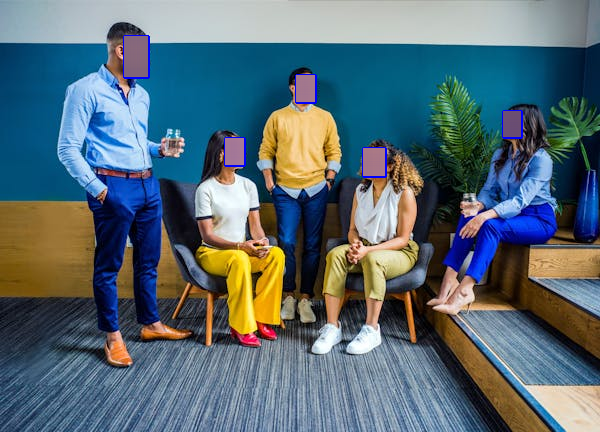

In [ ]:
# Tespit edilen her bir yüzü blurla
for result in faces:
    bounding_box = result['box']
    x, y, w, h = bounding_box[0], bounding_box[1], bounding_box[2], bounding_box[3]

    # Yüz bölgesini al ve blurla
    face_img = img[y:y+h, x:x+w]
    blurred_face_img = cv2.GaussianBlur(face_img, (99, 99), 30)  # Blurlama işlemi

    # Blurlanan yüzü tekrar orijinal görüntüye yerleştir
    img[y:y+h, x:x+w] = blurred_face_img

# Sonucu göster
cv2_imshow(img)